In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt


# Modèles prétrainées pour la détection des visages et des yeux

In [2]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

In [4]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_color)
            if len(eyes) >= 2:
                return roi_color

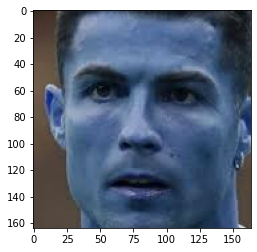

In [5]:
test=get_cropped_image_if_2_eyes('./data/Cristiano Ronaldo/cri.jpg')
plt.imshow(test)

# capturer les visages du corpus 

In [10]:
path_to_data = "./data/"
path_to_cr_data = "./data/cropped/"

In [11]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [12]:
img_dirs

['./data3/Andriy Shevchenko',
 './data3/cavani',
 './data3/iker casillas',
 './data3/luka modric',
 './data3/pele',
 './data3/roberto bagio',
 './data3/samuel eto']

In [13]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [16]:

cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 450
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1  


Andriy Shevchenko
Generating cropped images in folder:  ./data3/cropped/Andriy Shevchenko
cavani
Generating cropped images in folder:  ./data3/cropped/cavani
iker casillas
Generating cropped images in folder:  ./data3/cropped/iker casillas
luka modric
Generating cropped images in folder:  ./data3/cropped/luka modric
pele
Generating cropped images in folder:  ./data3/cropped/pele
roberto bagio
Generating cropped images in folder:  ./data3/cropped/roberto bagio
samuel eto
Generating cropped images in folder:  ./data3/cropped/samuel eto


# LBP


size=256


def LBP(img): 
    
    def thresholded(center, pixels):
        out = []
        for a in pixels:
            if a >= center:
                out.append(1)
            else:
                out.append(0)
        return out

    
    def get_pixel_else_0(img,x,y):
        size=len(img)
        default=0
        if x<0 or y<0 or x>size-1 or y>size-1 :
            return default
        else:
            return img[x][y]




    image=cv2.resize(img,(size,size))
    temp=np.zeros((size,size),dtype=np.uint8)
    for x in range(0, len(image)):
        for y in range(0, len(image[0])):
 
            center = image[x,y]

            top_left      = get_pixel_else_0(image, x-1, y-1)

            top_up        = get_pixel_else_0(image, x-1, y)

            top_right     = get_pixel_else_0(image, x-1, y+1)

            right         = get_pixel_else_0(image, x, y+1 )

            left          = get_pixel_else_0(image, x, y-1 )

            bottom_left   = get_pixel_else_0(image, x+1, y-1)

            bottom_right  = get_pixel_else_0(image, x+1, y+1)

            bottom_down   = get_pixel_else_0(image, x+1,   y )

            values=[]
            values = thresholded(center, [top_left, top_up, top_right, right, bottom_right,
                                  bottom_down, bottom_left, left])

            weights = [1, 2 , 4, 8 , 16 , 32, 64, 128]
            res = 0
            for a in range(0, len(values)):
                res += weights[a] * values[a]

            temp[x][y]=res

    #_ = plt.hist(temp, bins=64)  
    #plt.show()
    hist, bin_edges = np.histogram(temp,bins=64)
    
    return hist

img=cv2.imread('./data/Cristiano Ronaldo/cri.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY )
img_lbp=LBP(gray)


In [158]:
from skimage.feature import local_binary_pattern

In [159]:
def LBP(path):
    P = 8
    R = 1
    img=cv2.imread(path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    lbp_img = local_binary_pattern(gray, P=P, R=R, method="default")
    return lbp_img

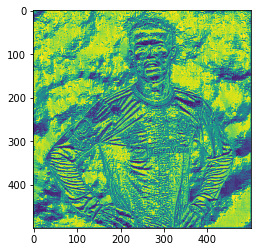

In [160]:
celebrity_file_names_dict = {}

for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Alessandro Del Piero': ['./data2/cropped/Alessandro Del Piero\\Alessandro Del Piero1.png',
  './data2/cropped/Alessandro Del Piero\\Alessandro Del Piero10.png',
  './data2/cropped/Alessandro Del Piero\\Alessandro Del Piero11.png',
  './data2/cropped/Alessandro Del Piero\\Alessandro Del Piero12.png',
  './data2/cropped/Alessandro Del Piero\\Alessandro Del Piero13.png',
  './data2/cropped/Alessandro Del Piero\\Alessandro Del Piero14.png',
  './data2/cropped/Alessandro Del Piero\\Alessandro Del Piero15.png',
  './data2/cropped/Alessandro Del Piero\\Alessandro Del Piero16.png',
  './data2/cropped/Alessandro Del Piero\\Alessandro Del Piero17.png',
  './data2/cropped/Alessandro Del Piero\\Alessandro Del Piero18.png',
  './data2/cropped/Alessandro Del Piero\\Alessandro Del Piero19.png',
  './data2/cropped/Alessandro Del Piero\\Alessandro Del Piero2.png',
  './data2/cropped/Alessandro Del Piero\\Alessandro Del Piero20.png',
  './data2/cropped/Alessandro Del Piero\\Alessandro Del Piero21.png'

In [161]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Alessandro Del Piero': 0,
 'Andriy Shevchenko': 1,
 'Cristiano Ronaldo': 2,
 'Didier Drogba': 3,
 'Pele': 4,
 'Samuel Eto': 5}

# construire le matrices X constitué par les vecteurs caractéristiques des image de corpus

In [ ]:
from imutils import paths
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        
        path=training_image
        lbp=LBP(path)
        
        img = cv2.imread(training_image)
        if img is None:
            continue
            
        scalled_raw_img=cv2.resize(img,(32,32))
        scalled_img_lbp=cv2.resize(lbp,(32,32))
        combined=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_lbp.reshape(32*32,1)))
        
        X.append(combined)
        y.append(class_dict[celebrity_name])     